In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import xgboost
from sklearn.metrics import mean_squared_error, r2_score, f1_score
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
sns.set_style('whitegrid')

In [2]:
dfPuntos = pd.read_csv("dataLimpio/dfPuntos.csv",index_col=0)
dfPuntos

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,female,male,wep,activity_category
id,,,,,,,,,,,,
1,male,58,187,87,23,111,40.8,190,False,True,138,7
2,male,39,165,69,30,108,41.0,195,False,True,150,7
3,female,60,152,54,3,86,38.5,14,True,False,12,5
4,male,22,188,80,11,86,40.1,28,False,True,44,5
5,male,41,178,87,15,83,40.3,48,False,True,60,5
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,female,23,160,58,26,101,40.7,144,True,False,130,7
9997,female,57,161,61,23,102,40.5,143,True,False,115,7
9998,male,36,172,70,7,87,39.3,22,False,True,28,5


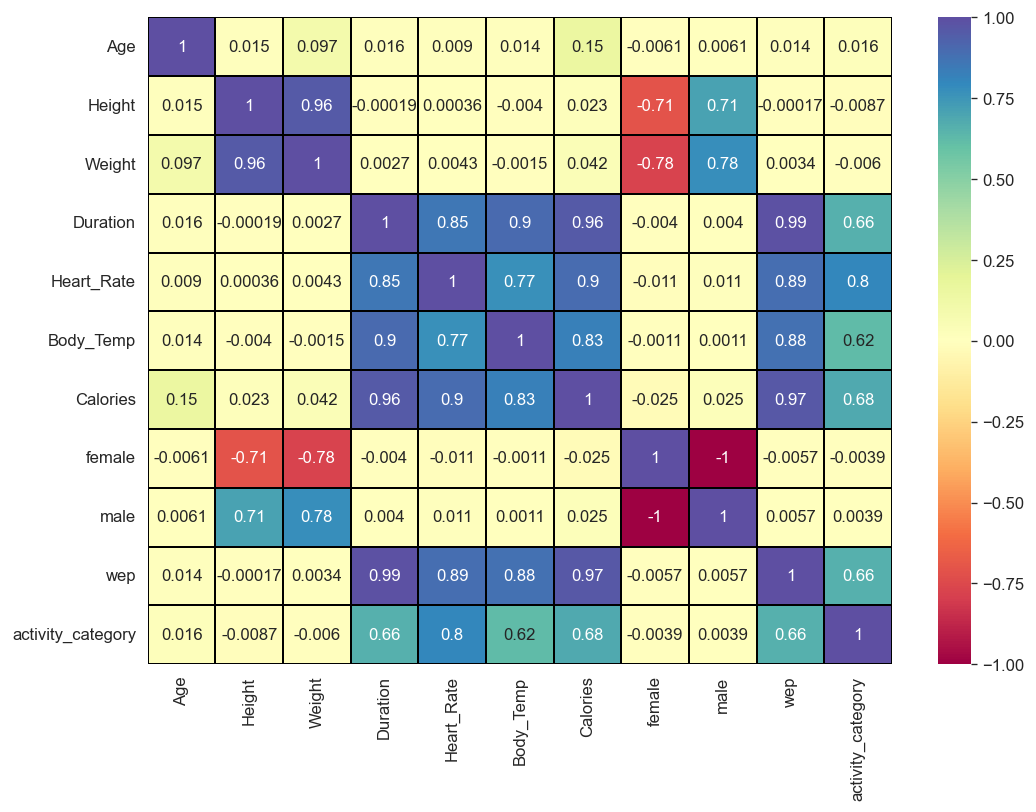

In [3]:
sns.heatmap(dfPuntos.corr(numeric_only=True), annot=True,vmax=1,vmin=-1,cmap="Spectral", linecolor="black",linewidths=1);

In [4]:
dfPuntos.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories', 'female', 'male', 'wep', 'activity_category'],
      dtype='object')

In [10]:
X = dfPuntos[['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate','female', 'male', 'wep', 'activity_category']]
yLog = np.log1p(dfPuntos["Calories"])

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, yLog, test_size = 0.20, random_state=42) 

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
gbr_model1 = GradientBoostingRegressor(n_estimators=500 , random_state=42,verbose=1)
gbr_model1.fit(X_train, y_train)


      Iter       Train Loss   Remaining Time 
         1           0.7539            6.94s
         2           0.6196            6.82s
         3           0.5102            6.77s
         4           0.4213            6.54s
         5           0.3485            6.41s
         6           0.2893            6.52s
         7           0.2413            6.62s
         8           0.2018            6.39s
         9           0.1695            6.11s
        10           0.1432            5.87s
        20           0.0342            6.29s
        30           0.0135            6.01s
        40           0.0073            5.42s
        50           0.0048            5.10s
        60           0.0037            4.78s
        70           0.0029            4.53s
        80           0.0023            4.38s
        90           0.0020            4.19s
       100           0.0017            4.05s
       200           0.0009            3.46s
       300           0.0006            2.24s
       40

GradientBoostingRegressor(n_estimators=500, random_state=42, verbose=1)

In [16]:
import xgboost

xgb_model = xgboost.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

# Tarda 30 min en hacer el FIT

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 6,7,8],
    'min_samples_split': [5,6,7],
    'min_samples_leaf': [1,3,4]
}

gbr_model = GradientBoostingRegressor(n_estimators=500 , random_state=42)

grid_search = GridSearchCV(gbr_model, param_grid, scoring='neg_mean_absolute_error', cv=3,)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best MAE:", -grid_search.best_score_)


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 6}
Best MAE: 0.017482142016598482


In [27]:
importances = grid_search.best_estimator_.feature_importances_

for i, feature in enumerate(X.columns):
    print(f"Variable {i + 1}: {feature} - Importancia: {importances[i]}")

Variable 1: Duration - Importancia: 0.015511986725796949
Variable 2: Heart_Rate - Importancia: 3.0986634125020896e-05
Variable 3: wep - Importancia: 0.0018415689710133403
Variable 4: activity_category - Importancia: 0.020642086157164334


In [21]:
from sklearn.metrics import mean_absolute_error

y_predLog = grid_search.best_estimator_.predict(X_test)
y_pred = np.expm1(y_predLog)

print(grid_search.best_estimator_.score(X_test,y_test))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))
print("----------------------------------------------------------------")

y_predLog = xgb_model.predict(X_test)
y_pred = np.expm1(y_predLog)

print(xgb_model.score(X_test,y_test))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))
print("----------------------------------------------------------------")


y_predLog = gbr_model1.predict(X_test)
y_pred = np.expm1(y_predLog)

print(gbr_model1.score(X_test,y_test))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))
print("----------------------------------------------------------------")

0.9992362342377573
MAE 84.58421296710871
MSE 10919.095206272194
RMSE 104.49447452507809
----------------------------------------------------------------
0.9986500117146685
MAE 84.56395886642345
MSE 10910.0443405823
RMSE 104.45115767947381
----------------------------------------------------------------
0.999260445695188
MAE 84.58087729837428
MSE 10918.891214835021
RMSE 104.4934984333237
----------------------------------------------------------------


In [23]:
X = dfPuntos[['Duration', 'Heart_Rate','wep', 'activity_category']]
yLog = np.log1p(dfPuntos["Calories"])

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, yLog, test_size = 0.20, random_state=42) 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
gbr_model1 = GradientBoostingRegressor(n_estimators=500 , random_state=42,verbose=1)
gbr_model1.fit(X_train, y_train)

import xgboost

xgb_model = xgboost.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.7539            2.89s
         2           0.6196            3.47s
         3           0.5102            3.49s
         4           0.4213            3.10s
         5           0.3485            2.78s
         6           0.2893            2.55s
         7           0.2413            2.40s
         8           0.2019            2.34s
         9           0.1697            2.29s
        10           0.1435            2.27s
        20           0.0400            2.66s
        30           0.0250            2.32s
        40           0.0224            2.21s
        50           0.0216            2.93s
        60           0.0213            3.62s
        70           0.0211            3.69s
        80           0.0210            3.81s
        90           0.0209            3.82s
       100           0.0208            3.80s
       200           0.0204            2.30s
       300           0.0202            1.31s
       40

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [25]:
y_predLog = xgb_model.predict(X_test)
y_pred = np.expm1(y_predLog)

print(xgb_model.score(X_test,y_test))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))
print("----------------------------------------------------------------")


y_predLog = gbr_model1.predict(X_test)
y_pred = np.expm1(y_predLog)

print(gbr_model1.score(X_test,y_test))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))
print("----------------------------------------------------------------")

0.9739936250940383
MAE 84.17669713873275
MSE 10695.920627410926
RMSE 103.42108405644821
----------------------------------------------------------------
0.9745295429198502
MAE 84.0958844932528
MSE 10672.176853722578
RMSE 103.30622853304915
----------------------------------------------------------------


      Iter       Train Loss   Remaining Time 
         1           0.7849            3.29s
         2           0.6445            2.00s
         3           0.5305            1.50s
         4           0.4378            1.25s
         5           0.3622            1.10s
         6           0.3009            1.94s
         7           0.2507            1.83s
         8           0.2096            1.78s
         9           0.1757            1.63s
        10           0.1481            1.52s
        20           0.0386            1.22s
        30           0.0219            1.03s
        40           0.0188            0.92s
        50           0.0179            0.85s
        60           0.0174            0.75s
        70           0.0170            0.68s
        80           0.0166            0.62s
        90           0.0164            0.58s
       100           0.0161            0.55s
       200           0.0144            0.53s
       300           0.0133            0.30s
       40

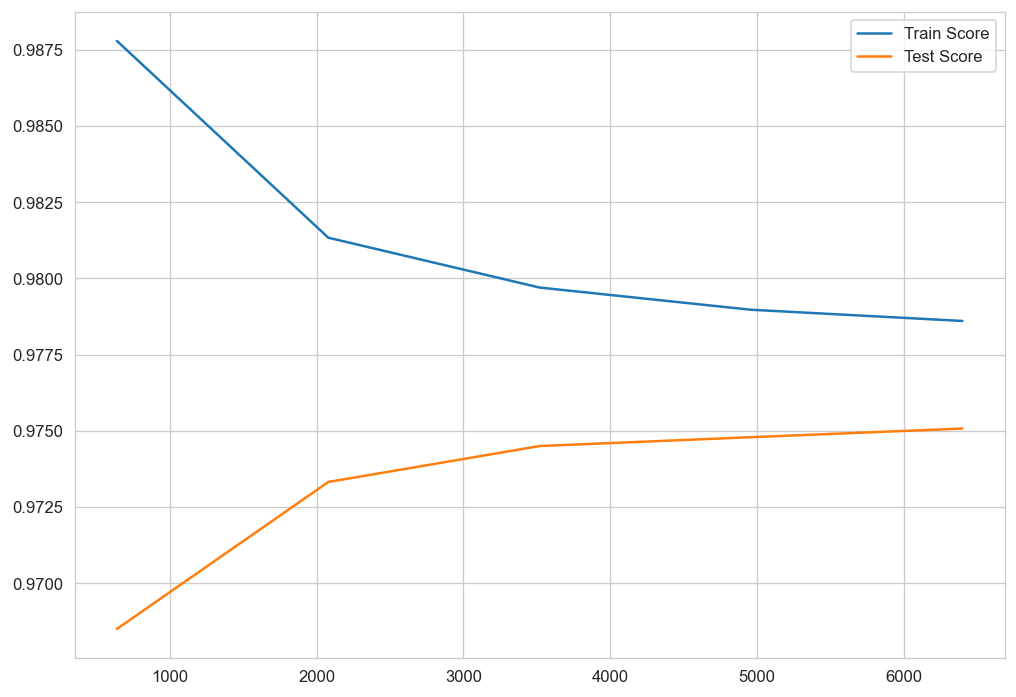

In [26]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(gbr_model1, X_train, y_train, cv=5)

plt.plot(train_sizes, train_scores.mean(axis=1), label="Train Score")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Test Score")
plt.legend()
plt.show()

In [28]:
from sklearn.model_selection import cross_val_score

results_cv = cross_val_score(gbr_model1, scaler.transform(X), (yLog), cv=5, scoring="neg_mean_absolute_error")
print(results_cv)
print(results_cv.mean())
print(results_cv.std())

      Iter       Train Loss   Remaining Time 
         1           0.7605            2.92s
         2           0.6251            2.69s
         3           0.5146            2.68s
         4           0.4246            2.96s
         5           0.3518            3.06s
         6           0.2921            2.87s
         7           0.2435            2.95s
         8           0.2036            2.88s
         9           0.1713            2.84s
        10           0.1449            2.86s
        20           0.0403            2.73s
        30           0.0250            2.77s
        40           0.0224            3.04s
        50           0.0217            3.04s
        60           0.0215            2.80s
        70           0.0213            2.62s
        80           0.0212            2.42s
        90           0.0211            2.30s
       100           0.0210            2.21s
       200           0.0207            1.68s
       300           0.0205            1.08s
       40

In [29]:
# Guardar el modelo
import pickle

with open('models/finished_model.pkl', "wb") as archivo_salida:
    pickle.dump(gbr_model1, archivo_salida)


In [31]:
# Para volver a leer el modelo
with open('models/finished_model.pkl', "rb") as archivo_entrada:
    gbr_model1 = pickle.load(archivo_entrada)
    
gbr_model1

GradientBoostingRegressor(n_estimators=500, random_state=42, verbose=1)

In [32]:
dfPuntos.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories', 'female', 'male', 'wep', 'activity_category'],
      dtype='object')

In [33]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(dfPuntos.drop(columns=["Gender","Calories"]))
df_scaled

array([[ 0.88785164,  0.88956539,  0.80924826, ...,  1.01633337,
         1.28911686,  0.98605509],
       [-0.22619188, -0.65583118, -0.39032916, ...,  1.01633337,
         1.54695098,  0.98605509],
       [ 1.00511938, -1.56902007, -1.38997701, ..., -0.98392912,
        -1.41814135, -0.34537225],
       ...,
       [-0.40209349, -0.16411409, -0.32368597, ...,  1.01633337,
        -1.07436253, -0.34537225],
       [-1.04706605, -0.65583118, -0.85683149, ..., -0.98392912,
        -1.41814135, -3.67394059],
       [ 0.36014682,  1.10030129,  1.40903697, ...,  1.01633337,
         1.33208922,  0.98605509]])

### Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [34]:
df_scaled.shape

(10000, 10)

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA(n_components=df_scaled.shape[1])
X_pca = pca.fit_transform(df_scaled)
X_pca

array([[-2.61651046e+00,  1.85236991e+00,  7.90173783e-01, ...,
        -1.59737573e-01, -1.96226668e-01,  6.16069204e-17],
       [-3.07791753e+00,  4.58091681e-01, -3.97575608e-01, ...,
         1.15307782e-02,  1.32337006e-01,  1.45219848e-16],
       [ 2.85597744e+00, -2.39142732e+00,  1.05007972e+00, ...,
         3.63294711e-02,  1.05928330e-03,  1.02671480e-14],
       ...,
       [ 1.93427795e+00,  7.95026682e-01, -5.21261235e-01, ...,
        -2.41961664e-01,  1.49932361e-02,  1.56074583e-17],
       [ 4.75166821e+00, -1.69813070e+00, -9.50801348e-01, ...,
        -3.01373610e-02,  1.69360676e-02, -2.11525665e-17],
       [-2.36650392e+00,  2.24792920e+00,  3.14809901e-01, ...,
         1.93033866e-01,  9.35024754e-02,  2.49649041e-17]])

In [37]:
len(X_pca[0])

10

In [38]:
pca.explained_variance_ratio_.cumsum()

array([0.4225627 , 0.76964681, 0.87023645, 0.92036498, 0.96888169,
       0.98687153, 0.99614749, 0.99927745, 1.        , 1.        ])

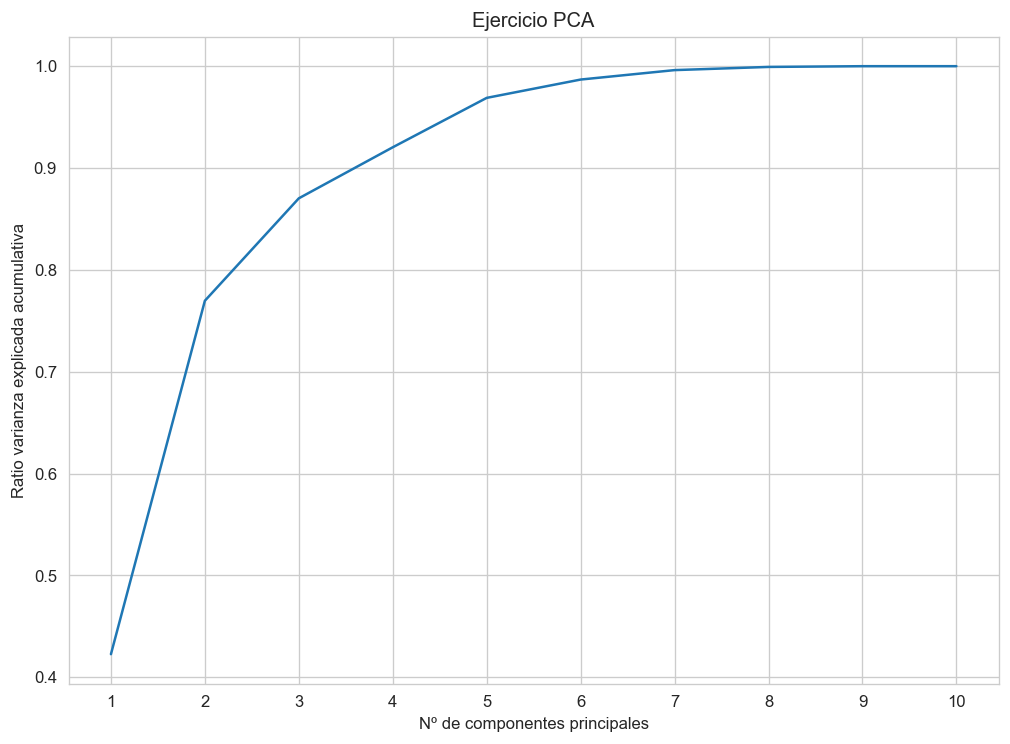

In [40]:
plt.plot(pd.Series(pca.explained_variance_ratio_.cumsum(), index=np.arange(1,11)))
plt.xlabel("Nº de componentes principales")
plt.ylabel("Ratio varianza explicada acumulativa")
plt.title("Ejercicio PCA")
plt.xticks(np.arange(1,11));

In [49]:
from sklearn.pipeline import make_pipeline

In [50]:
dfPuntosClean = dfPuntos.drop(columns=["Gender","Calories"])

In [52]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=dfPuntosClean.shape[1]))
pca_pipe.fit_transform(dfPuntosClean)

modelo_pca = pca_pipe['pca']

### Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [53]:
pca_pipe['pca']

PCA(n_components=10)

In [54]:
modelo_pca.components_

array([[-9.73052630e-03, -4.06425906e-03, -6.22307176e-03,
        -4.69341341e-01, -4.56440241e-01, -4.43701313e-01,
         8.62492851e-03, -8.62492851e-03, -4.70235009e-01,
        -3.91267794e-01],
       [ 2.51564880e-02,  4.85369634e-01,  5.07276819e-01,
        -6.35320638e-03, -3.90823571e-03, -8.04087790e-03,
        -5.03110733e-01,  5.03110733e-01, -5.73253930e-03,
        -7.72814656e-03],
       [ 9.93933571e-01, -4.03531569e-03,  7.08955398e-02,
        -3.10536313e-03, -1.00016023e-02, -3.16162680e-03,
         5.87415684e-02, -5.87415684e-02, -5.30881713e-03,
         2.14384656e-03],
       [-5.14010434e-02,  3.68990064e-01,  2.61328024e-01,
         2.35445632e-01, -1.78019893e-01,  2.78598014e-01,
         3.09096796e-01, -3.09096796e-01,  2.03949267e-01,
        -6.28881854e-01],
       [ 6.75455913e-02, -4.55863161e-01, -3.19894330e-01,
         1.86164615e-01, -1.47794653e-01,  2.27627106e-01,
        -3.78883064e-01,  3.78883064e-01,  1.62766048e-01,
        -5.

In [56]:
modelo_pca.explained_variance_ratio_

array([4.22562702e-01, 3.47084111e-01, 1.00589638e-01, 5.01285345e-02,
       4.85167088e-02, 1.79898351e-02, 9.27595743e-03, 3.12996033e-03,
       7.22553639e-04, 4.17045409e-33])

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------


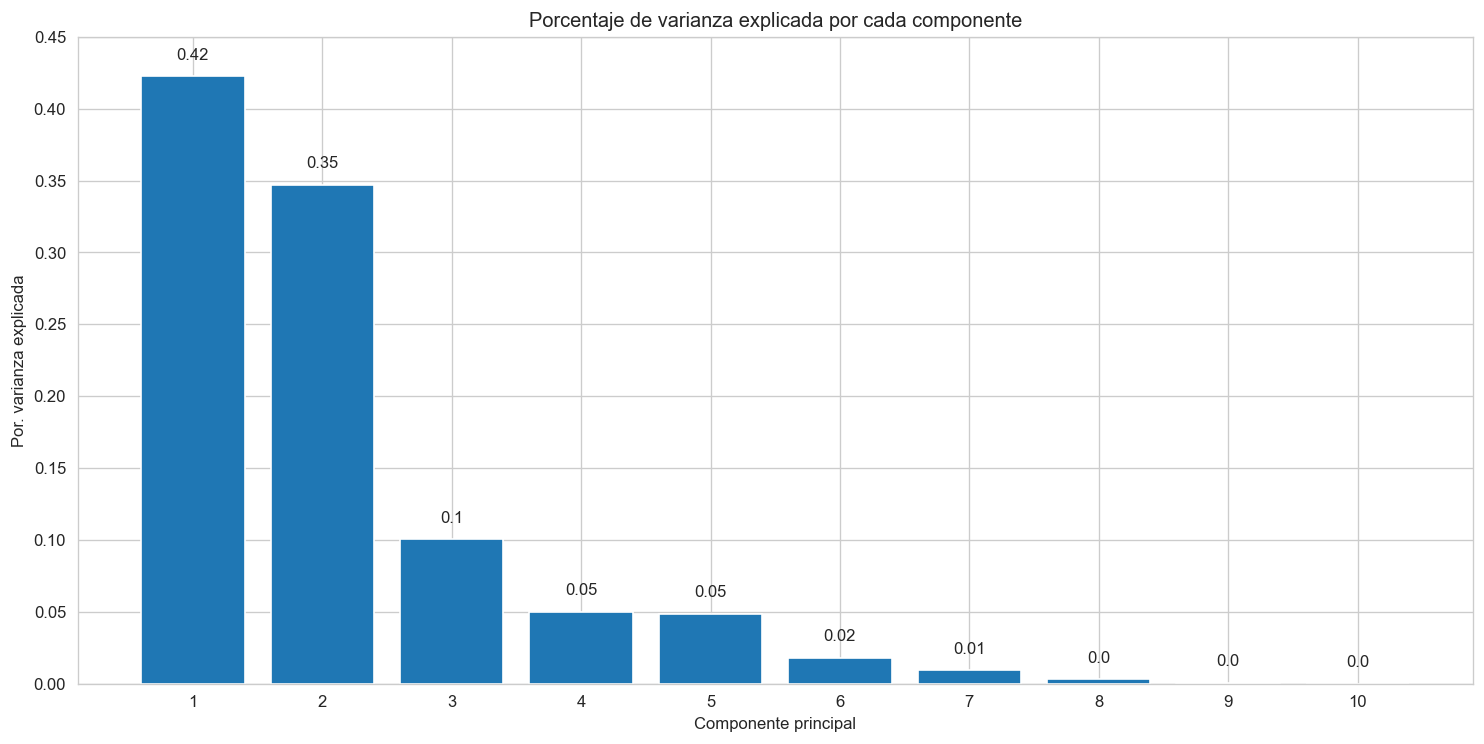

In [57]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
#### CODE ####

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(dfPuntosClean.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 0.45)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

In [58]:
modelo_pca.explained_variance_ratio_.cumsum()

array([0.4225627 , 0.76964681, 0.87023645, 0.92036498, 0.96888169,
       0.98687153, 0.99614749, 0.99927745, 1.        , 1.        ])

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.4225627  0.76964681 0.87023645 0.92036498 0.96888169 0.98687153
 0.99614749 0.99927745 1.         1.        ]


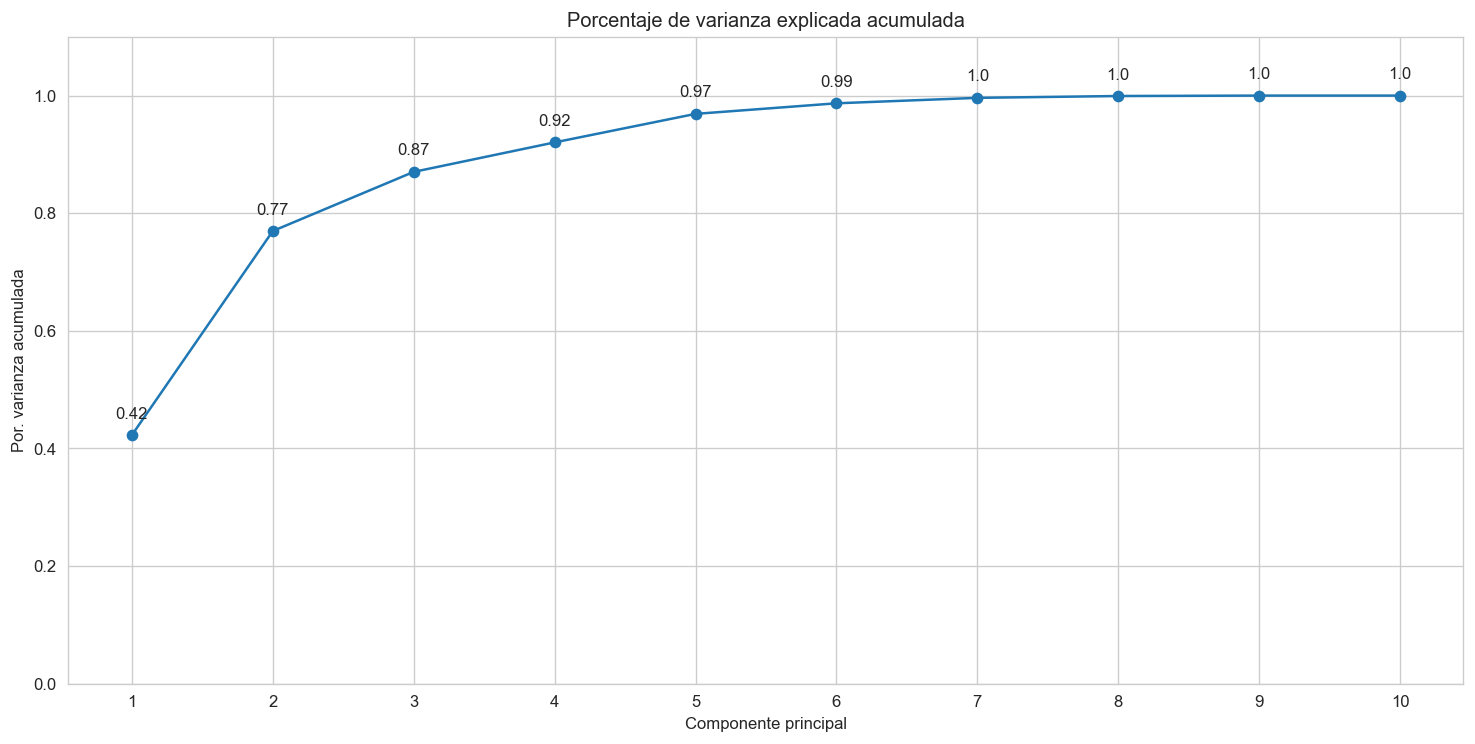

In [59]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))
ax.plot(
    np.arange(len(dfPuntosClean.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(dfPuntosClean.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [46]:
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(df_scaled)

In [47]:
df_pca2 = pd.DataFrame(X_pca2, columns=['PC1', 'PC2'])
df_pca2

,PC1,PC2
0,-2.616510,1.852370
1,-3.077918,0.458092
2,2.855977,-2.391427
3,1.140212,1.645120
4,0.771784,1.562989
...,...,...
9995,-2.097554,-2.109112
9996,-1.732131,-1.917663
9997,1.934278,0.795027
9998,4.751668,-1.698131


In [48]:
df_pca_origin = pd.DataFrame(pca2.components_, columns=dfPuntos.drop(columns=["Gender","Calories"]).columns, index=['PC1', 'PC2'])
df_pca_origin

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,female,male,wep,activity_category
PC1,-0.009731,-0.004064,-0.006223,-0.469341,-0.456440,-0.443701,0.008625,-0.008625,-0.470235,-0.391268
PC2,0.025156,0.485370,0.507277,-0.006353,-0.003908,-0.008041,-0.503111,0.503111,-0.005733,-0.007728


In [60]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=3))
modelo_pca = pca_pipe['pca']
proyecciones = pca_pipe.fit_transform(X=dfPuntosClean)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2','PC3'],
    index   = dfPuntosClean.index
)
proyecciones.head()

,PC1,PC2,PC3
id,,,
1,-2.616510,1.852370,0.790174
2,-3.077918,0.458092,-0.397576
3,2.855977,-2.391427,1.050080
4,1.140212,1.645120,-1.299952
5,0.771784,1.562989,-0.157753


In [61]:
from sklearn.preprocessing import scale

proyecciones = np.dot(modelo_pca.components_, scale(dfPuntosClean).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2','PC3'])
proyecciones = proyecciones.transpose().set_index(dfPuntosClean.index)
proyecciones.head()

,PC1,PC2,PC3
id,,,
1,-2.616510,1.852370,0.790174
2,-3.077918,0.458092,-0.397576
3,2.855977,-2.391427,1.050080
4,1.140212,1.645120,-1.299952
5,0.771784,1.562989,-0.157753


In [62]:
# Recostruccion de las proyecciones
# ==============================================================================
reconstruccion = pca_pipe.inverse_transform(proyecciones)
reconstruccion = pd.DataFrame(
    reconstruccion,
    columns = dfPuntosClean.columns,
    index = dfPuntosClean.index
)

print('------------------')
print('Valores reconstruidos')
print('------------------')
display(np.expm1(reconstruccion.head()))

print('------------------')
print('Valores Origin')
print('------------------')
display(dfPuntosClean.head())



------------------
Valores reconstruidos
------------------


,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,female,male,wep,activity_category
id,,,,,,,,,,
1,9.200679e+24,2.079460e+81,1.272561e+39,1.447243e+11,2.730331e+46,5.903098e+17,0.055601,1.575103,2.791746e+58,1137.735339
2,9.842841e+15,1.496932e+77,9.235714e+33,9.776012e+11,2.428829e+47,7.009016e+17,0.444744,0.881497,1.319584e+63,1511.051697
3,4.921134e+25,2.748487e+68,9.414091e+24,8.904293e+01,1.237701e+36,9.080823e+16,2.166889,-0.141655,7.855155e+06,47.007909
4,1.849427e+09,4.505884e+80,2.002426e+37,6.368608e+04,2.432447e+39,1.614566e+17,0.062959,1.557278,9.716534e+22,123.632009
5,4.865174e+17,2.443882e+80,3.738455e+37,2.625783e+05,1.096725e+40,1.830401e+17,0.120381,1.426213,2.378331e+26,154.483189


------------------
Valores Origin
------------------


,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,female,male,wep,activity_category
id,,,,,,,,,,
1,58,187,87,23,111,40.8,False,True,138,7
2,39,165,69,30,108,41.0,False,True,150,7
3,60,152,54,3,86,38.5,True,False,12,5
4,22,188,80,11,86,40.1,False,True,44,5
5,41,178,87,15,83,40.3,False,True,60,5
